# **Data Science** | Python: Exploração dos dados de crédito:

# **Tópicos**

<ol type="1">
  <li>Descrição sobre o problema;</li>
  <li>Importações;</li>
  <li>Etapa de exploração;</li>
  <li>Etapa de transformação e limpeza;</li>
  <li>Etapa de análise/Gráficos;</li>
  <li>Resumo dos insights gerados.</li>
</ol>

## 1\. Descrição sobre o problema

Vamos explorar dados de crédito presentes neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



## 2\. Importações

### **2.1. Bibliotecas Utilizadas**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2.2. Dados Utilizados**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

## 3\. Etapa de exploração

### **3.1. Estrutura dos Dados**

In [3]:
# Buscando entender melhor a estrutura dos dados para as primeiras correções.
display(df)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [4]:
# Colunas limite_credito e valor_transacoes_12m precisam ser convertidas, não podem ser definidas como Object
df.dtypes


id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [6]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [7]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## 4\. Etapa de transformação e limpeza

### **4.1. Correção de Schema**

In [8]:
# Correção das colunas limite_credito e valor_transacoes_12m precisam ser convertidas, não podem ser definidas como Object
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)


In [9]:
# A coluna id pode ser considerada Objeto neste caso:
df['id'] = df['id'].astype('object')


In [10]:
df.dtypes

id                          object
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [11]:
display(df)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,4003.91,15476.26,117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,4277.04,8764.88,69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,5409.16,10291.78,60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,5281.84,8395.62,62


### **4.2. Correção dos dados faltantes**

In [12]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [13]:
# O Número total de informações faltantes estão sendo somados nas colunas: escolaridade, estado_civil, salario_anual
df.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [14]:
# O Número total de informações 10127
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  object 
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             8608 non-null   object 
 6   estado_civil             9378 non-null   object 
 7   salario_anual            9015 non-null   object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

In [15]:
df_total, _ = df.shape
print(df_total)


10127


In [16]:
# O Número total em Adimplentes de informações faltantes estão sendo somados nas colunas: escolaridade, estado_civil, salario_anual
df[df['default'] == 0].isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1263
estado_civil                620
salario_anual               925
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [17]:
# O Número total em Adimplentes de informações = 8500
print(df[df['default'] == 0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 0 to 10122
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8500 non-null   object 
 1   default                  8500 non-null   int64  
 2   idade                    8500 non-null   int64  
 3   sexo                     8500 non-null   object 
 4   dependentes              8500 non-null   int64  
 5   escolaridade             7237 non-null   object 
 6   estado_civil             7880 non-null   object 
 7   salario_anual            7575 non-null   object 
 8   tipo_cartao              8500 non-null   object 
 9   meses_de_relacionamento  8500 non-null   int64  
 10  qtd_produtos             8500 non-null   int64  
 11  iteracoes_12m            8500 non-null   int64  
 12  meses_inativo_12m        8500 non-null   int64  
 13  limite_credito           8500 non-null   float64
 14  valor_transacoes_12m   

In [18]:
df_total_adimplente, _ = df[df['default'] == 0].shape
print(df_total_adimplente)

8500


In [19]:
# O Número total em Inadimplentes de informações faltantes estão sendo somados nas colunas: escolaridade, estado_civil, salario_anual
df[df['default'] == 1].isna().sum()

id                           0
default                      0
idade                        0
sexo                         0
dependentes                  0
escolaridade               256
estado_civil               129
salario_anual              187
tipo_cartao                  0
meses_de_relacionamento      0
qtd_produtos                 0
iteracoes_12m                0
meses_inativo_12m            0
limite_credito               0
valor_transacoes_12m         0
qtd_transacoes_12m           0
dtype: int64

In [20]:
# O Número total em Inadimplentes de informações = 1627
print(df[df['default'] == 1].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1627 non-null   object 
 1   default                  1627 non-null   int64  
 2   idade                    1627 non-null   int64  
 3   sexo                     1627 non-null   object 
 4   dependentes              1627 non-null   int64  
 5   escolaridade             1371 non-null   object 
 6   estado_civil             1498 non-null   object 
 7   salario_anual            1440 non-null   object 
 8   tipo_cartao              1627 non-null   object 
 9   meses_de_relacionamento  1627 non-null   int64  
 10  qtd_produtos             1627 non-null   int64  
 11  iteracoes_12m            1627 non-null   int64  
 12  meses_inativo_12m        1627 non-null   int64  
 13  limite_credito           1627 non-null   float64
 14  valor_transacoes_12m  

In [21]:
df_total_inadimplente, _ = df[df['default'] == 1].shape
print(df_total_inadimplente)

1627


In [22]:
# Verificaremos o impacto que será gerado ao realizar a correção dos valores vazios,
# para que não haja um desbalancemento das informações e consequentemente manipulação incorreta.
def calcular_porcentagens(total_linhas, soma_faltantes) -> None:
    porcentagens = []

    for chave, valor in soma_faltantes[0].items():
        porcentagem = round((valor / total_linhas) * 100, 2)
        dict_dados = {chave: {'Soma Faltantes': valor, 'Porcentagem':porcentagem}}
        porcentagens.append(dict_dados)
    for percent in porcentagens:
     print(percent)

# Valor Total
print('Valor Total:')
df_total = 10127
faltantes_total = [{'escolaridade': 1519, 'estado_civil': 749, 'salario_anual': 1112}]
resultados = calcular_porcentagens(total_linhas = df_total, soma_faltantes = faltantes_total)
print('\n')

# Valor Total Adimplentes
print('Valor Total Adimplentes:')
df_total_adimplente = 8500
faltantes_total_adimplente = [{'escolaridade': 1263, 'estado_civil': 620, 'salario_anual': 925}]
resultados = calcular_porcentagens(total_linhas = df_total_adimplente, soma_faltantes = faltantes_total_adimplente)
print('\n')

# Valor Total Inadimplentes
print('Valor Total Inadimplentes:')
df_total_inadimplente = 1627
faltantes_total_inadimplente = [{'escolaridade': 256, 'estado_civil': 129, 'salario_anual': 187}]
resultados = calcular_porcentagens(total_linhas = df_total_inadimplente, soma_faltantes = faltantes_total_inadimplente)
print('\n')

Valor Total:
{'escolaridade': {'Soma Faltantes': 1519, 'Porcentagem': 15.0}}
{'estado_civil': {'Soma Faltantes': 749, 'Porcentagem': 7.4}}
{'salario_anual': {'Soma Faltantes': 1112, 'Porcentagem': 10.98}}


Valor Total Adimplentes:
{'escolaridade': {'Soma Faltantes': 1263, 'Porcentagem': 14.86}}
{'estado_civil': {'Soma Faltantes': 620, 'Porcentagem': 7.29}}
{'salario_anual': {'Soma Faltantes': 925, 'Porcentagem': 10.88}}


Valor Total Inadimplentes:
{'escolaridade': {'Soma Faltantes': 256, 'Porcentagem': 15.73}}
{'estado_civil': {'Soma Faltantes': 129, 'Porcentagem': 7.93}}
{'salario_anual': {'Soma Faltantes': 187, 'Porcentagem': 11.49}}




In [23]:
# Removendo linhas sem valores:
df.dropna(inplace=True)

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7081 non-null   object 
 1   default                  7081 non-null   int64  
 2   idade                    7081 non-null   int64  
 3   sexo                     7081 non-null   object 
 4   dependentes              7081 non-null   int64  
 5   escolaridade             7081 non-null   object 
 6   estado_civil             7081 non-null   object 
 7   salario_anual            7081 non-null   object 
 8   tipo_cartao              7081 non-null   object 
 9   meses_de_relacionamento  7081 non-null   int64  
 10  qtd_produtos             7081 non-null   int64  
 11  iteracoes_12m            7081 non-null   int64  
 12  meses_inativo_12m        7081 non-null   int64  
 13  limite_credito           7081 non-null   float64
 14  valor_transacoes_12m   

In [25]:
df.isna().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

In [26]:
df.shape

(7081, 16)

In [27]:
df[df['default'] == 0].shape

(5968, 16)

In [28]:
df[df['default'] == 1].shape

(1113, 16)

In [29]:
display(df)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,M,1,ensino medio,solteiro,$60K - $80K,blue,34,5,0,2,13940.62,15577.67,114
10121,713899383,0,56,F,1,mestrado,solteiro,menos que $40K,blue,50,4,4,1,3688.95,14596.49,120
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,4003.91,15476.26,117
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,5409.16,10291.78,60


## 5\. Etapa de análise/Gráficos

In [30]:
sns.set_style("whitegrid")

In [31]:
df_adimplente = df[df['default'] == 0]

In [32]:
df_inadimplente = df[df['default'] == 1]

### **5.1. Visualizações Categóricas**

In [33]:
df.drop('id', axis=1).select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


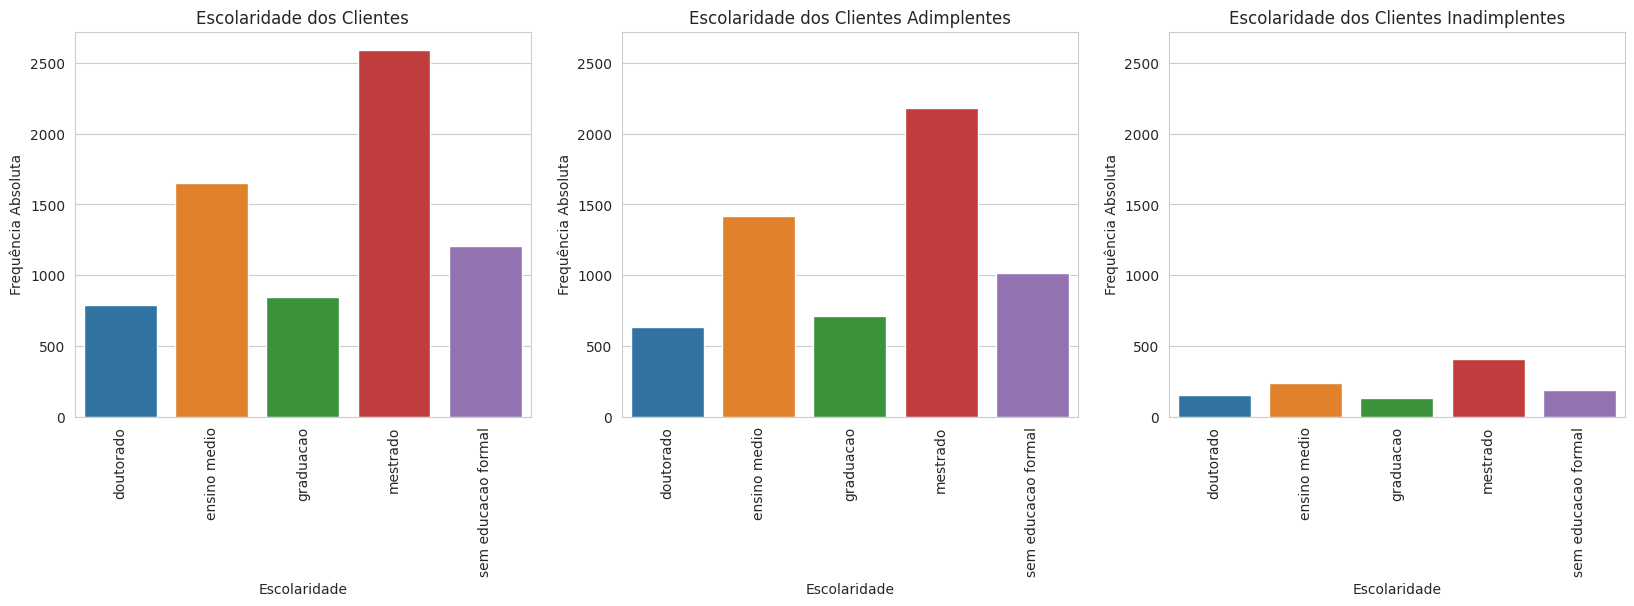

In [34]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

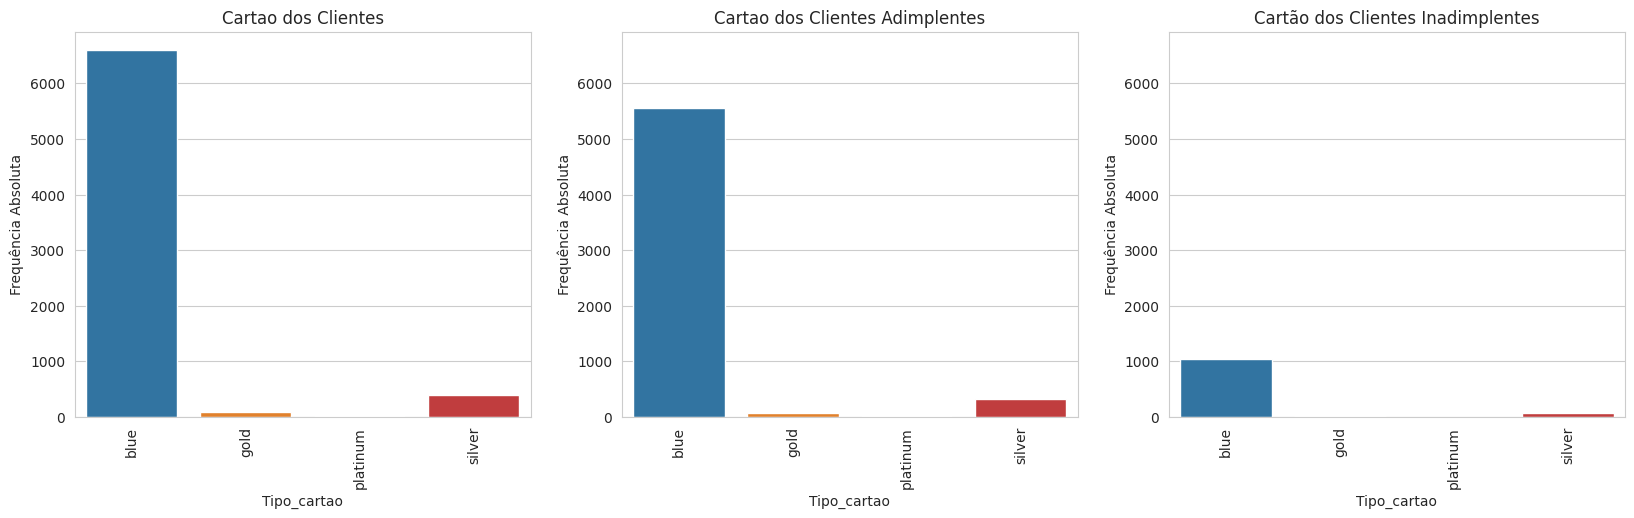

In [35]:
coluna = 'tipo_cartao'
titulos = ['Cartao dos Clientes', 'Cartao dos Clientes Adimplentes', 'Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

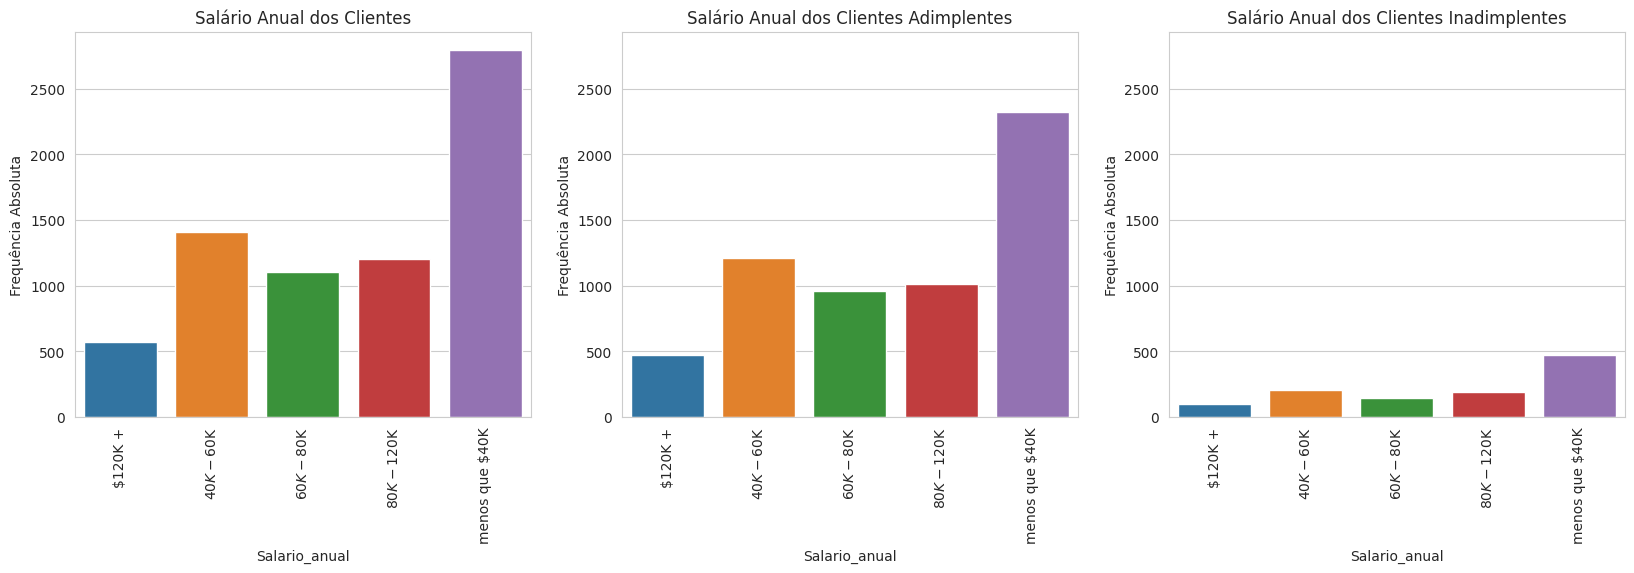

In [36]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

### **5.2. Visualizações Numéricas**

In [37]:
df.drop('default', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


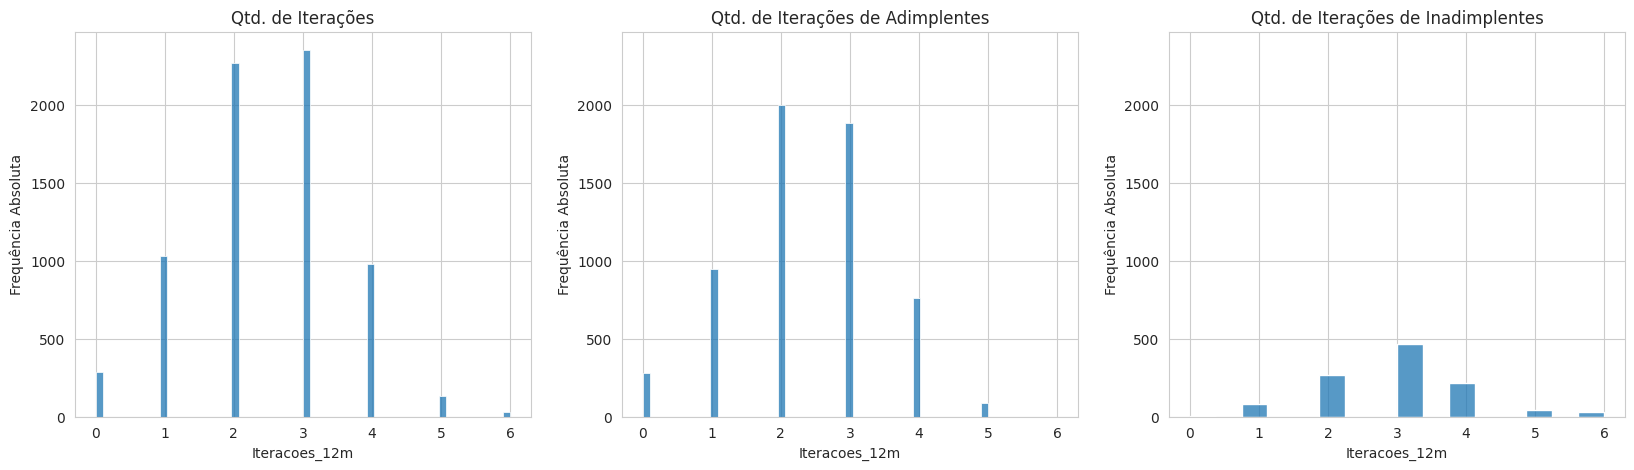

In [38]:
coluna = 'iteracoes_12m'
titulos = ['Qtd. de Iterações', 'Qtd. de Iterações de Adimplentes', 'Qtd. de Iterações de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

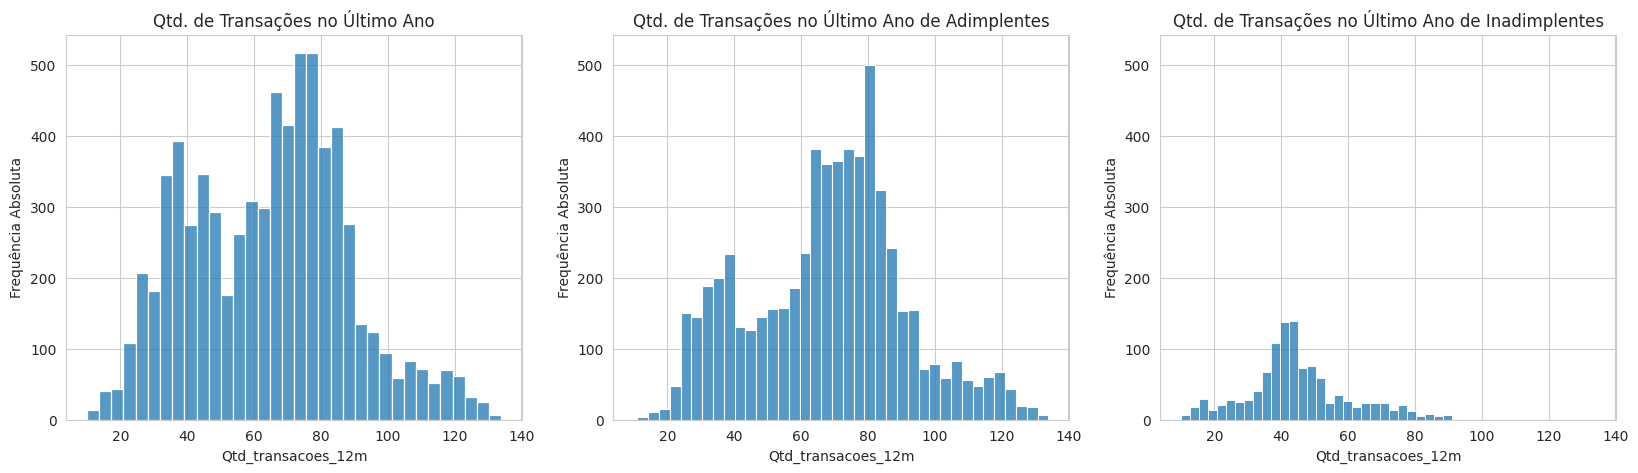

In [39]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

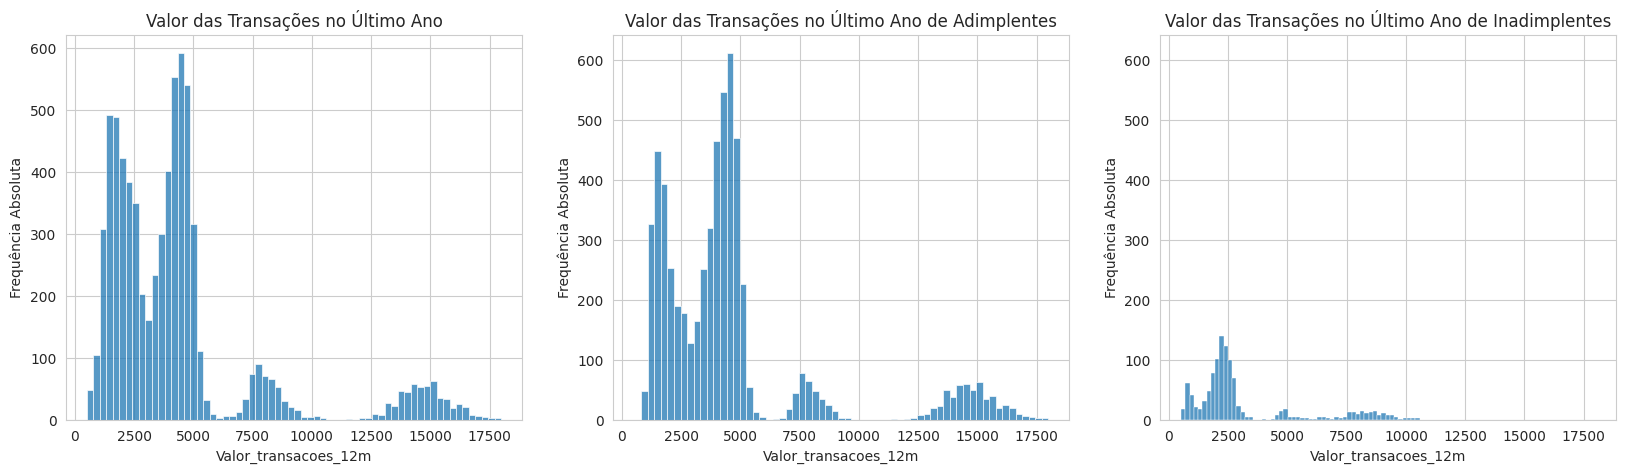

In [40]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

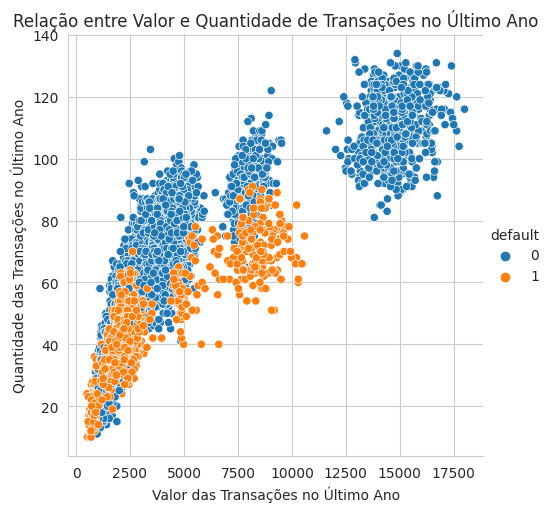

In [41]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

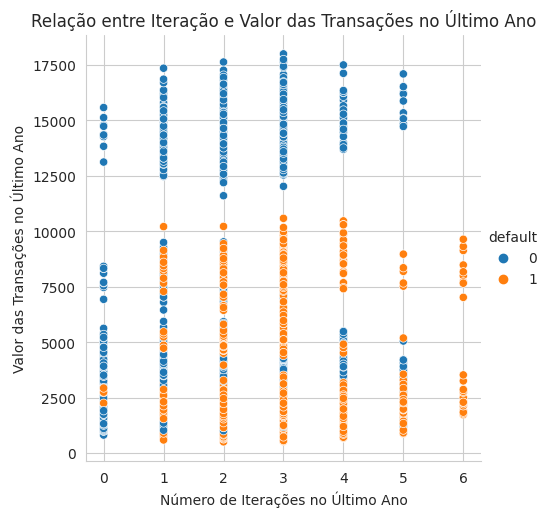

In [42]:
f = sns.relplot(x='iteracoes_12m', y='valor_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Iteração e Valor das Transações no Último Ano',
    xlabel='Número de Iterações no Último Ano',
    ylabel='Valor das Transações no Último Ano'
  )

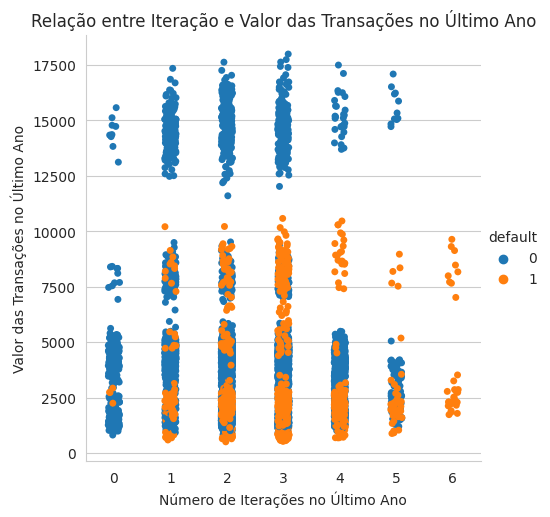

In [43]:
f = sns.catplot(data=df, x='iteracoes_12m', y='valor_transacoes_12m', hue='default')
_ = f.set(
    title='Relação entre Iteração e Valor das Transações no Último Ano',
    xlabel='Número de Iterações no Último Ano',
    ylabel='Valor das Transações no Último Ano'
  )


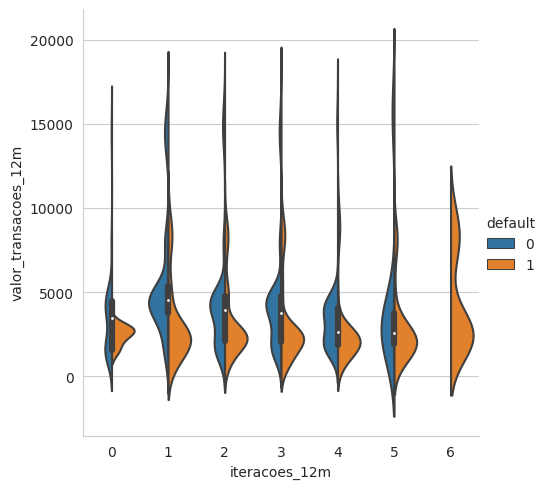

In [44]:
sns.catplot(
    data=df, x='iteracoes_12m', y='valor_transacoes_12m', hue='default',
    kind="violin", split=True,
)
_ = f.set(
    title='Relação entre Iteração e Valor das Transações no Último Ano',
    xlabel='Número de Iterações no Último Ano',
    ylabel='Valor das Transações no Último Ano'
)


## 6\. Resumo dos insights gerados

Conforme a proposta para exploração dos dados de crédito sobre clientes de uma instituição financeira, buscamos explicar por meio de análise de diversas informações o que faz um cliente tornar-se um devedor.

Iniciando com os insights gerados pelas análises categóricas:

1- Gráficos gerados pela escolaridade dos clientes: Conseguimos verificar que existe um padrão na distribuição que se mantém entre os valores Totais, Adimplentes e Inadimplentes. Uma sutil pontualidade surge apenas em questão do perfil Doutorado em Inadimplentes que possui um valor maior e diverge da tendência dos demais, mas não é suficiente para determinar um padrão podendo este ser ignorado.

2-Gráficos gerados pelo tipo de cartão dos clientes: Percebe-se que ao visualizar o gráfico conseguimos concluir que **Clientes Gold possuem tendência em se manter Adimplentes, assim como clientes Silver** que são em sua minoria Inadimplentes, sendo necessário dar **atenção principal aos clientes Blue com sua Inadimplência.**

3-Gráficos gerados pelo Salário Anual dos clientes: Assim como a análise dos clientes através do nivel de escolaridade, existe um padrão na distribuição que se mantém não podendo ser criada conclusões significativas.


Iniciando com os insights gerados pelas análises categóricas:

1- Gráficos gerados pela quantidade de iterações com os clientes: Os principais pontos que percebemos a inadimplência está na 3ª interação havendo indícios partindo da 2ª interação. Clientes que possuem a 6ª interação podem ser considerados em sua totalidade inadimplentes. Os principais valores de tranção estão entre:
1)0,00 até 5000,00 e ápice de 2500,00;
2)5000,00 até 10000,00 e ápice de 8300,00.

2-Gráficos gerados pela quantidade de transações e Valores de transação dos clientes: Podemos concluir que clientes que transacionam grandes valores e em um volume alto possuem uma tendência de permanecer adimplentes.
A tendência para que ocorra inadimplência podem ser definidas por:
1)Trasações de 0,00 até 3750,00 em que a quantidade seja de 10 até 70;
2)Trasações de 5000,00 em que a quantidade seja de 40 até 80;
3)Trasações de 7500,00 até 10000,00 em que a quantidade seja de 50 até 90.